In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir_path = '/Users/kessapassa/OneDrive - 神奈川工科大学/Laboratory/修論/files/'
dir_path += '染谷/'
file_name = '2分前_201808080204_2020-02-10_13-32-52'
path = dir_path + file_name + '.txt'

In [3]:
# A1:筋電位(emg), A2:心電図(ecg), A3:皮膚電気活動(eda), A4:脳波(eeg)
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
print('{}分{:.2f}秒'.format(df.shape[0]//sampling_rate//60, df.shape[0]/sampling_rate%60))
df.head()

(425700, 11)
7分5.70秒


/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,509.0,868.0,1020.0,7.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,511.0,811.0,1020.0,7.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,511.0,750.0,1020.0,7.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,511.0,686.0,1020.0,6.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,509.0,621.0,1020.0,7.0,0.0,0.0


In [58]:
target='A3'
start_minite = 5.5
end_minite = 6.5

start_time = int(sampling_rate * 60 * start_minite)
end_time = int(sampling_rate * 60 * end_minite)
df_target = df[target][start_time:end_time]
# df_target = df[target]

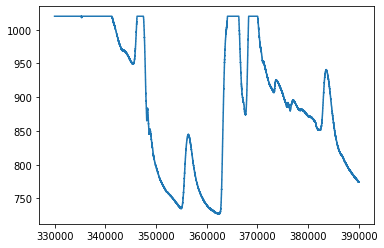

In [59]:
plt.plot(df_target)

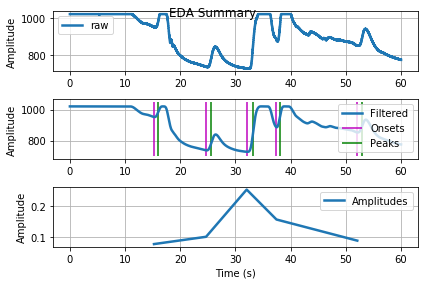

In [60]:
from biosppy import storage
from biosppy.signals import eda

out =  eda.eda(df_target.values, sampling_rate=sampling_rate)

In [61]:
out.keys()

['ts', 'filtered', 'onsets', 'peaks', 'amplitudes']

In [62]:
out['filtered']

array([1020.00000039, 1020.00000039, 1020.00000039, ...,  775.29604711,
        775.29342622,  775.29082645])

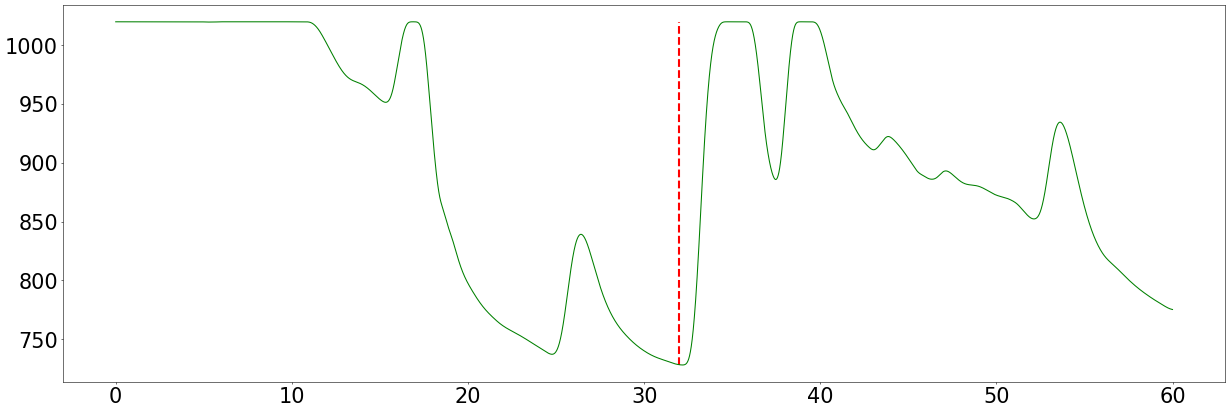

In [74]:
plt.figure(figsize=(30, 10), dpi=50)
plt.rcParams["font.size"] = 30
plt.plot(out['ts'], out['filtered'], 'g')
plt.vlines(32, out['filtered'].min(), out['filtered'].max(), 'red', linestyles='dashed', lw=3)
# plt.savefig('eda.png')

In [39]:
import sys
sys.path.append('./')
from common import Common

In [79]:
train_data =df[target][10000:12000].values
test_data = df_target.values
c = Common(train_data, test_data)

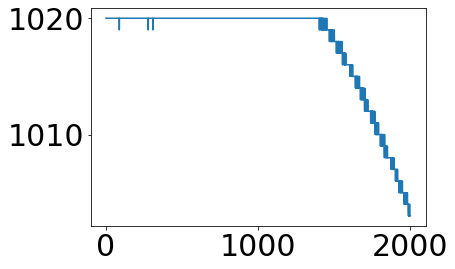

In [80]:
plt.plot(train_data)

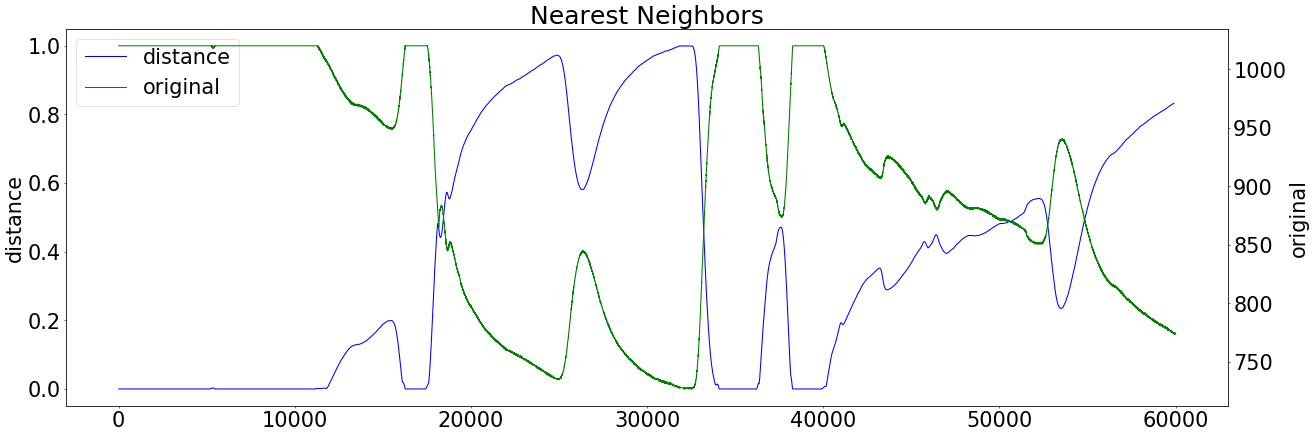

In [81]:
c.k_neighborhood()

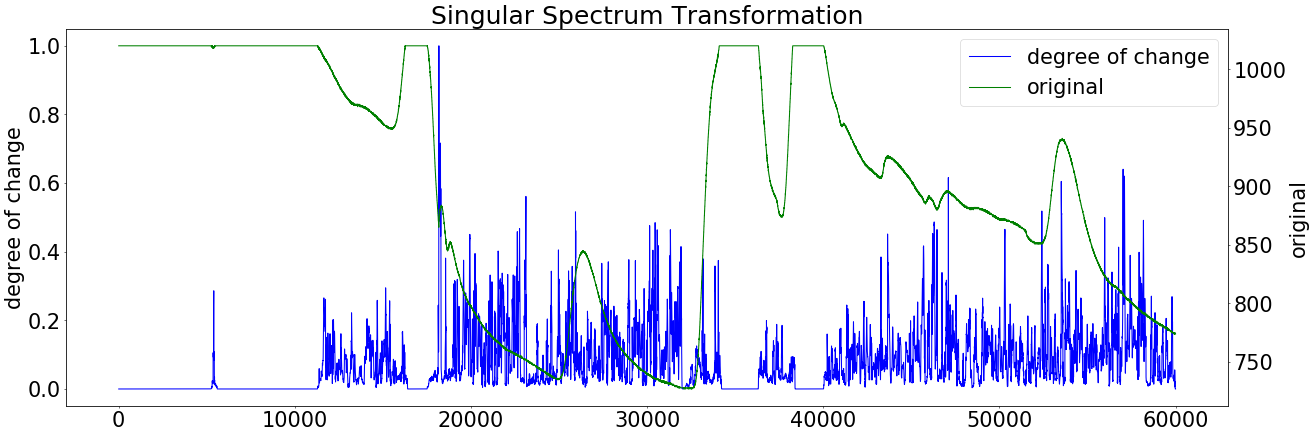

In [82]:
c.ssa()